In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base = "/content/drive/MyDrive/dataset"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [6]:
data = pd.read_csv(base+"/google_stock.csv")

In [8]:

# Remove commas and convert to floats
data['Close'] = data['Close'].str.replace(',', '').astype(float)

# Extract the 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)


In [9]:
# Set the train-test split ratio (e.g., 80% for training, 20% for testing)
train_ratio = 0.8
train_size = int(len(scaled_prices) * train_ratio)
test_size = len(scaled_prices) - train_size

# Split the dataset
train_data = scaled_prices[:train_size, :]
test_data = scaled_prices[train_size:, :]


In [10]:
def create_sequences(dataset, seq_length):
    X, y = [], []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i + seq_length, 0])
        y.append(dataset[i + seq_length, 0])
    return np.array(X), np.array(y)

# Define the sequence length
sequence_length = 10

# Create sequences for training
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [11]:
# Define the model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
32/32 [==============================] - 3s 7ms/step - loss: 0.0263
Epoch 2/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 5/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 8/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 9/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0027
Epoch 10/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0026
Epoch 11/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0025
Epoch 12/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 13/50
32/32 [=========================

In [12]:
# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to get the actual stock prices
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


8/8 [==============================] - 0s 3ms/step


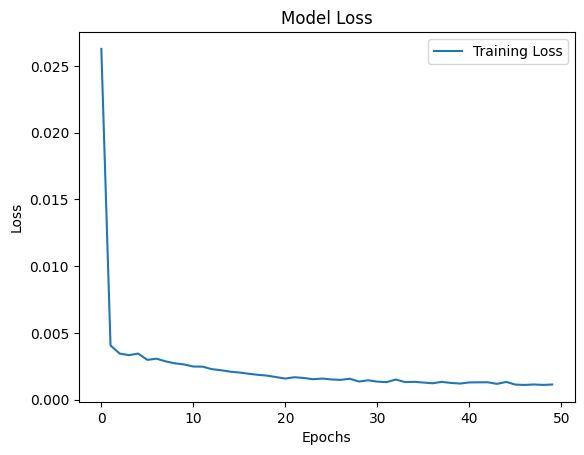

In [13]:
# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


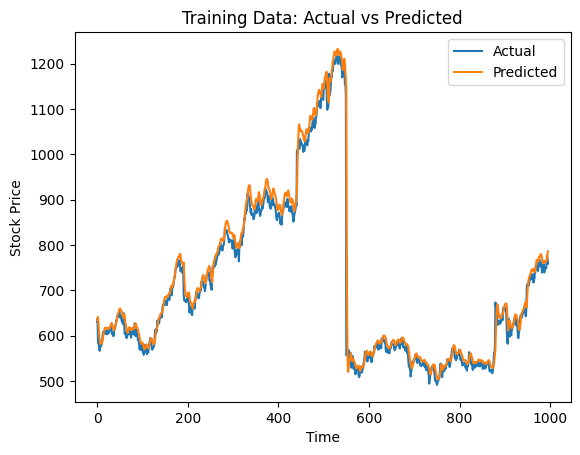

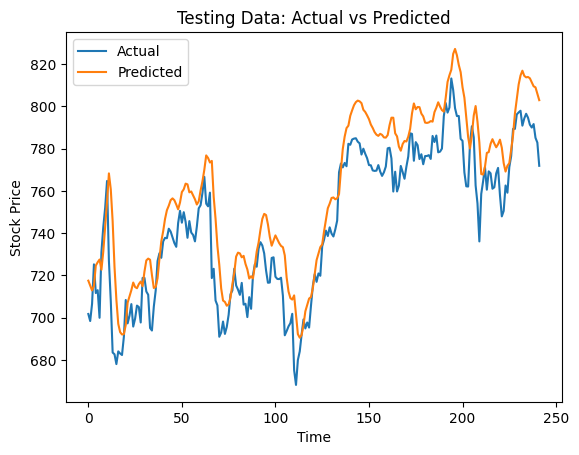

In [14]:
# Prepare the actual stock prices for plotting
train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual and predicted stock prices
plt.plot(train_actual, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.plot(test_actual, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
